In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [31]:
dataset_cols = ["bike_count", "hour", "temp", "humanity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df = pd.read_csv("SeoulBikeData.csv").drop(["Date", "Holiday", "Seasons"], axis=1)

In [32]:
df.columns = dataset_cols
df["functional"] = (df["functional"] == "Yes").astype(int)
df = df[df["hour"] == 12]
df = df.drop(["hour"], axis=1)

In [33]:
df.head()

,bike_count,temp,humanity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


C:\Users\Emir\AppData\Local\Temp\ipykernel_22568\2978819358.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


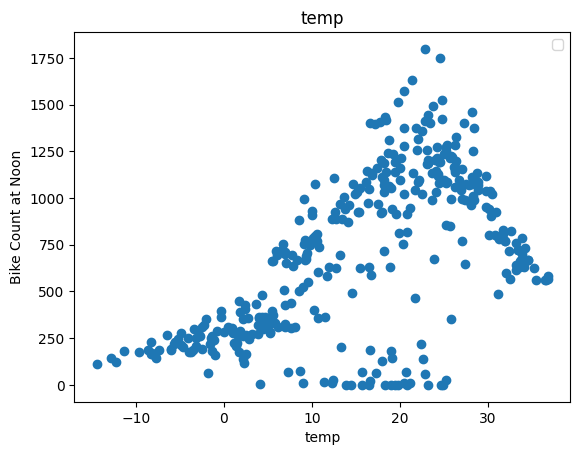

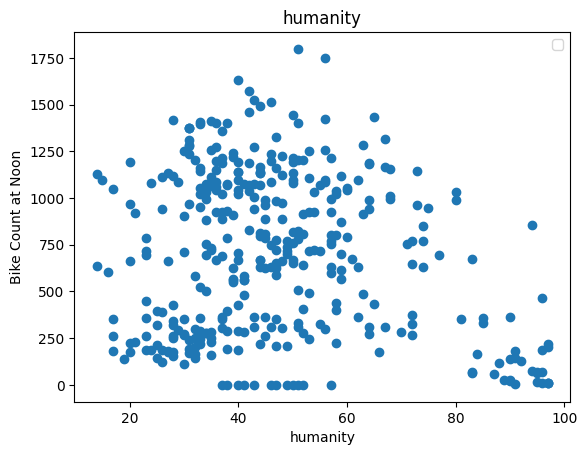

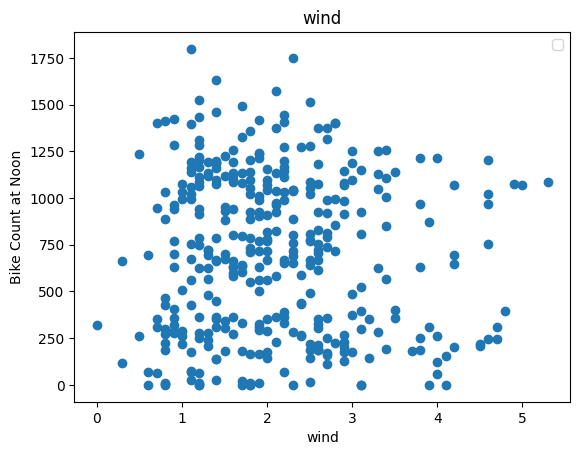

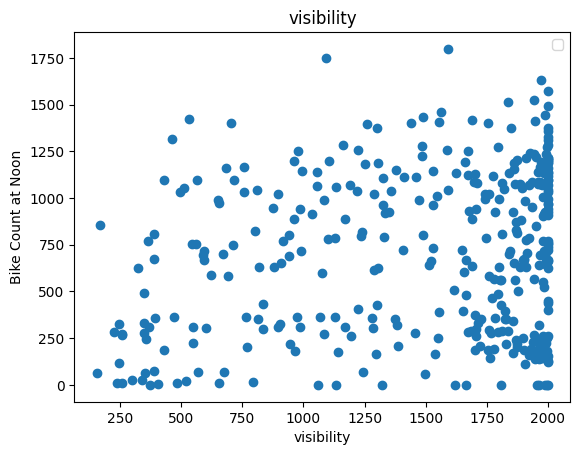

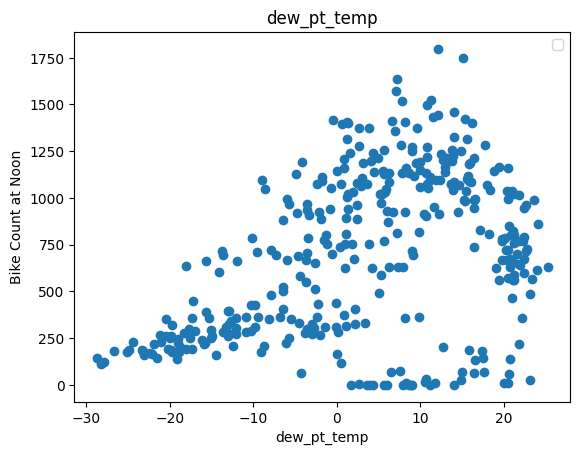

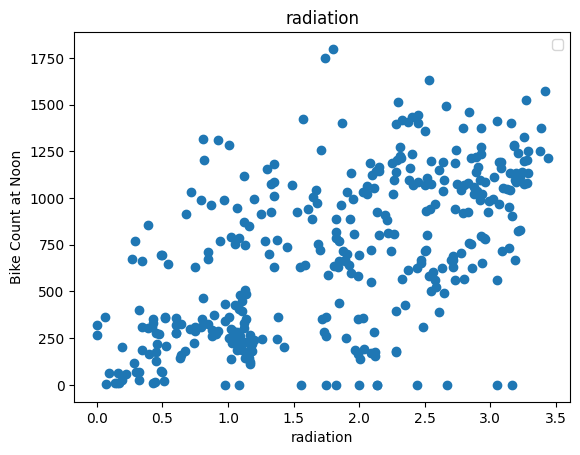

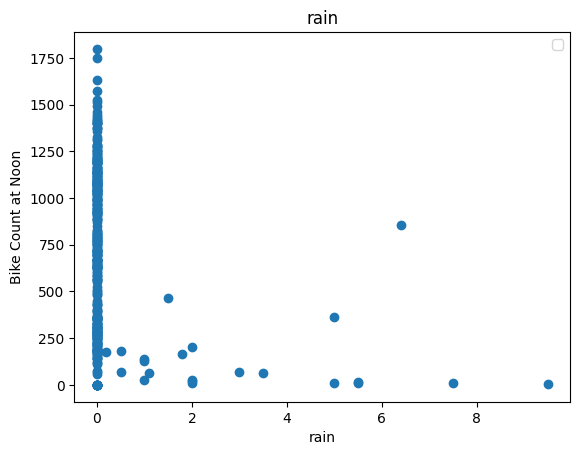

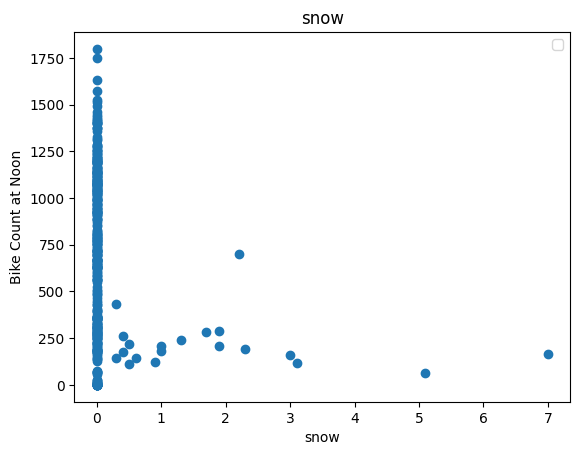

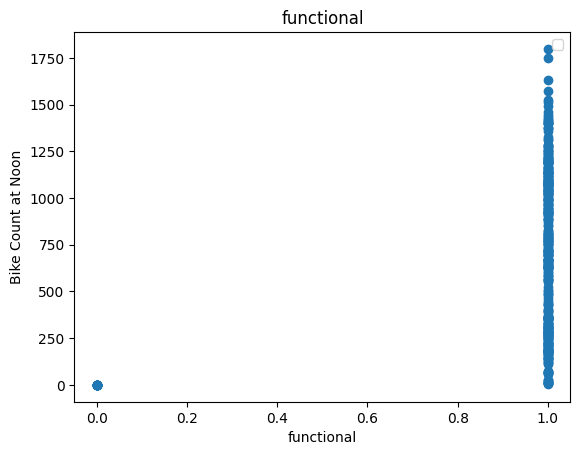

In [34]:
for label in df.columns[1:]:
    plt.scatter(df[label], df["bike_count"])
    plt.title(label)
    plt.ylabel("Bike Count at Noon")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [35]:
df = df.drop(["wind", "visibility", "functional"], axis=1)

In [36]:
df.head()

,bike_count,temp,humanity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [37]:
# Train, valid, test dataset

In [38]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

c:\Users\Emir\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [39]:
def get_xy(dataframe, y_label, x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if x_labels is None:
        X = dataframe[(c for c in dataframe.columns if c != y_label)].values
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1, 1)
        else:
            X = dataframe[x_labels].values
    
    y = dataframe[y_label].values.reshape(-1, 1)
    data = np.hstack((X, y))

    return data, X,  y


In [40]:
_, X_train_temp, y_train_temp  = get_xy(df, "bike_count", x_labels=["temp"])
_, X_val_temp, y_val_temp  = get_xy(val, "bike_count", x_labels=["temp"])
_, X_test_temp, y_test_temp  = get_xy(test, "bike_count", x_labels=["temp"])

In [41]:
temp_reg = LinearRegression()
temp_reg.fit(X=X_train_temp, y=y_train_temp)    # Training the data.

LinearRegression()

In [42]:
temp_reg.score(X_test_temp, y_test_temp)

0.349984323280072

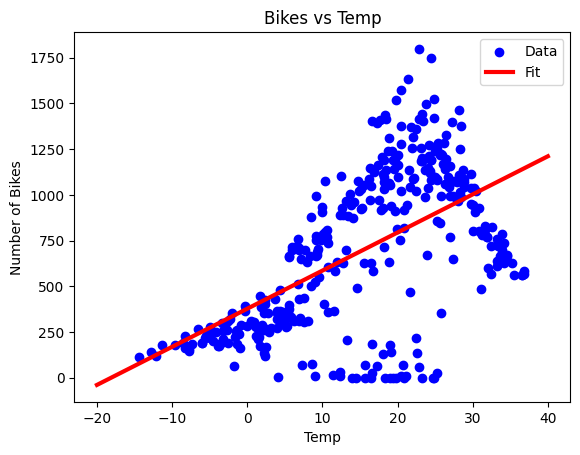

In [43]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
# temp_reg.predict(np.array(x).reshape(-1, 1))  # Making the prediction by trained data.
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temp")
plt.show()

In [44]:
# Multiple Linear Regression

In [45]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_labels=df.columns[1:])
_, X_val_all, y_val_all = get_xy(val, "bike_count", x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_labels=df.columns[1:])

c:\Users\Emir\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [46]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [47]:
all_reg.score(X_test_all, y_test_all)

0.39413369862987246

In [105]:
y_pred_lr = all_reg.predict(X_test_all)

In [48]:
# Regression with Neural Net

In [49]:
def plot_loss(history):
    plt.plot(history.history["loss"], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid(True)
    plt.show()

In [50]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

c:\Users\Emir\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

# We create linear regression model like that. only one neuron and no activion
# function in it. Check magic.ipynb for better understanding.

In [52]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

# Adam = Adaptive Moment Estimation

In [53]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data=(X_val_temp, y_val_temp)
)

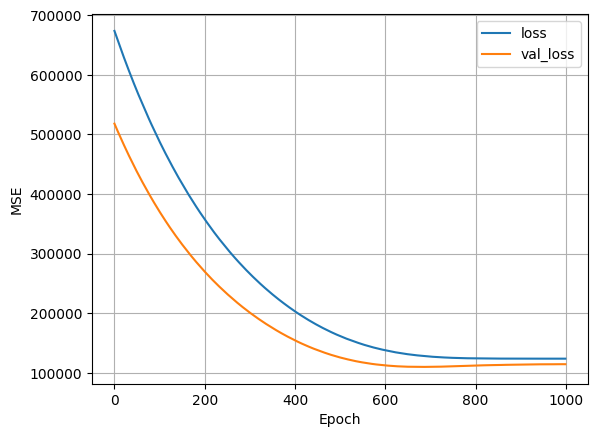

In [54]:
plot_loss(history)

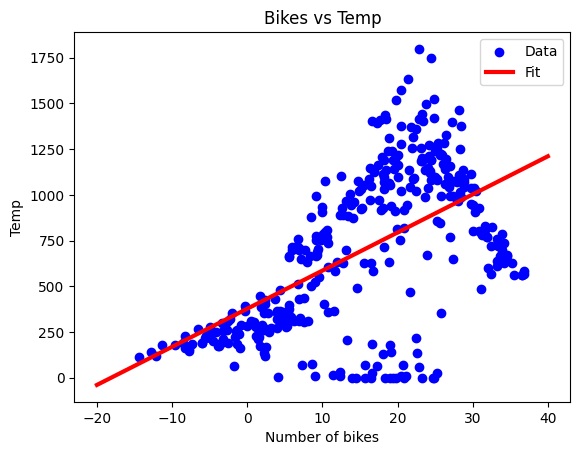

In [62]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.xlabel("Number of bikes")
plt.ylabel("Temp")
plt.show()

In [64]:
# Neural Net

In [80]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [81]:
history = nn_model.fit(
    X_train_temp, y_train_temp,
    validation_data=(X_val_temp, y_val_temp),
    epochs=100
)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 623151.3750 - val_loss: 519359.4375
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 670943.9375 - val_loss: 519067.9375
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 702885.5000 - val_loss: 518597.2188
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 661253.4375 - val_loss: 517816.7812
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 681606.1250 - val_loss: 516542.0312
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 686157.5000 - val_loss: 514509.0312
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 696375.7500 - val_loss: 511317.3750
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 691239.3750 - val_loss: 506489.8125
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 657950.8125 - val_loss: 499379.8750
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 648912.3125 - val_loss: 489338.9688
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/s

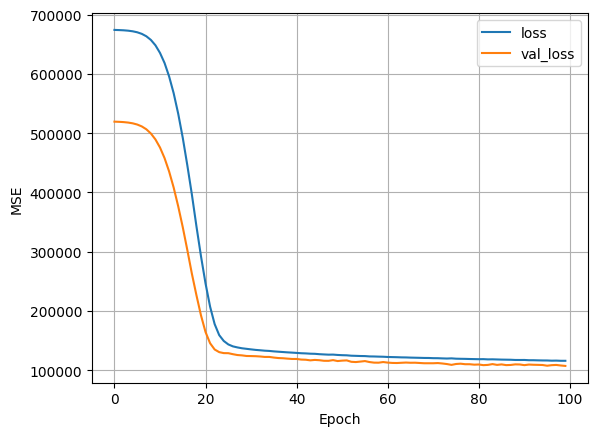

In [82]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


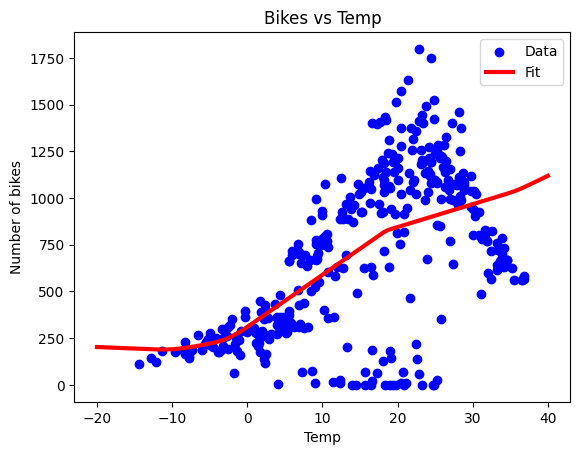

In [85]:
plt.scatter(X_train_temp, y_train_temp, label='Data', color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.xlabel("Temp")
plt.ylabel("Number of bikes")
plt.show()

In [96]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_normalizer.adapt(X_train_all)

In [97]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [98]:
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_all),
    epochs=100
)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 659068.2500 - val_loss: 660948.1875
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 634516.3750 - val_loss: 660676.2500
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 635626.3750 - val_loss: 660373.5000
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 619438.1250 - val_loss: 660022.6875
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 662432.1250 - val_loss: 659608.6875
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 601070.8750 - val_loss: 659115.9375
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 635000.2500 - val_loss: 658534.4375
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 695020.1250 - val_loss: 657841.1250
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 623902.9375 - val_loss: 657022.2500
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 604759.0000 - val_loss: 656006.0000
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 

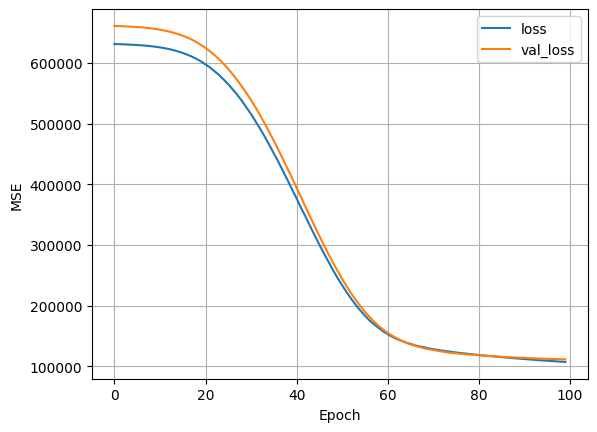

In [101]:
plot_loss(history)

In [109]:
# Calculate the MSE for both linear reg and nn
y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [111]:
def MSE(y_pred, y_real):
    return (np.square(y_pred - y_real)).mean()

In [117]:
MSE(y_pred_lr, y_test_all)

108175.65746565473

In [120]:
MSE(y_pred_nn, y_test_all)

125545.30617583336

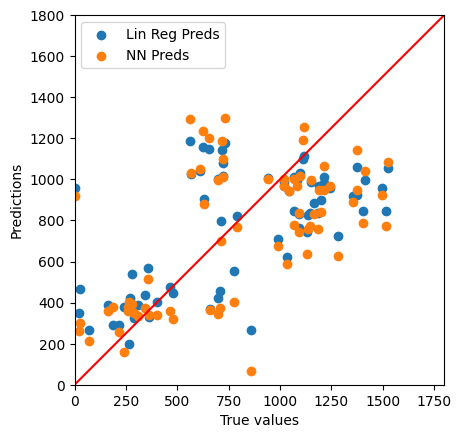

In [127]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_lr, label = "Lin Reg Preds")
plt.scatter(y_test_all, y_pred_nn, label = "NN Preds")
plt.xlabel("True values")
plt.ylabel("Predictions")
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c="red")